In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2
from ff_energy.ffe.slurm import SlurmJobHandler
from pathlib import Path
import pandas as pd
import jax.numpy as jnp
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ff_energy.ffe.potential import (
    LJ,
    DE,
)
from ff_energy.ffe.ff import FF
from ff_energy.ffe.constants import FFEPATH, PDB_PATH
from ff_energy.plotting.ffe_plots import plot_energy_MSE, plot_ff_fit
from ff_energy.plotting.plotting import set_style
from ff_energy.plotting.fit_results import residuals_plot, residuals_from_keys
from ff_energy.logs.logging import hide_logs
from ff_energy.ffe.potential import LJ, LJ_bound, DE

hide_logs()
import scienceplots
set_style(no_latex=True)

from ff_energy.ffe.ff_fit import (
    load_ff,
    fit_func,
    fit_repeat,
)

from ff_energy.utils.ffe_utils import pickle_output, read_from_pickle, str2int, PKL_PATH
from ff_energy.utils.json_utils import load_json
from ff_energy.ffe.structure import atom_key_pairs

from ff_energy.utils.ffe_utils import pickle_output, read_from_pickle, str2int, \
    PKL_PATH, get_structures

from sklearn.metrics import mean_squared_error as calc_rmse


0 ('C', 'C')
1 ('C', 'CG331')
2 ('C', 'CL')
3 ('C', 'CLA')
4 ('C', 'H')
5 ('C', 'HGA3')
6 ('C', 'HGP1')
7 ('C', 'HT')
8 ('C', 'OG311')
9 ('C', 'OT')
10 ('C', 'POT')
11 ('CG331', 'CG331')
12 ('CG331', 'CL')
13 ('CG331', 'CLA')
14 ('CG331', 'H')
15 ('CG331', 'HGA3')
16 ('CG331', 'HGP1')
17 ('CG331', 'HT')
18 ('CG331', 'OG311')
19 ('CG331', 'OT')
20 ('CG331', 'POT')
21 ('CL', 'CL')
22 ('CL', 'CLA')
23 ('CL', 'H')
24 ('CL', 'HGA3')
25 ('CL', 'HGP1')
26 ('CL', 'HT')
27 ('CL', 'OG311')
28 ('CL', 'OT')
29 ('CL', 'POT')
30 ('CLA', 'CLA')
31 ('CLA', 'H')
32 ('CLA', 'HGA3')
33 ('CLA', 'HGP1')
34 ('CLA', 'HT')
35 ('CLA', 'OG311')
36 ('CLA', 'OT')
37 ('CLA', 'POT')
38 ('H', 'H')
39 ('H', 'HGA3')
40 ('H', 'HGP1')
41 ('H', 'HT')
42 ('H', 'OG311')
43 ('H', 'OT')
44 ('H', 'POT')
45 ('HGA3', 'HGA3')
46 ('HGA3', 'HGP1')
47 ('HGA3', 'HT')
48 ('HGA3', 'OG311')
49 ('HGA3', 'OT')
50 ('HGA3', 'POT')
51 ('HGP1', 'HGP1')
52 ('HGP1', 'HT')
53 ('HGP1', 'OG311')
54 ('HGP1', 'OT')
55 ('HGP1', 'POT')
56 ('HT', 'HT'

<Figure size 100x100 with 0 Axes>

In [2]:
# PKLPATH = Path("/home/boittier/Documents/phd/ff_energy/pickles/")
# pd.read_csv(PKLPATH / "ELECmpol_water_cluster_lj_elec.csv")

#  Old FF objects

In [4]:
FFOBJ = pd.read_pickle(
    "/home/boittier/Documents/phd/ff_energy/pickles/ELECpol_ions_ext_de_intE_fitted.pkl")

In [5]:
FFOBJ.targets

Array([ 91.03776 ,  62.11281 ,  69.195816,  84.38131 ,  65.9635  ,
        71.145805,  75.59967 ,  75.54098 ,  98.557014,  79.9154  ,
        82.382935,  60.481895,  73.67867 ,  57.387474,  58.054832,
        82.02254 ,  85.435524,  65.3132  ,  69.67684 ,  84.04023 ,
        55.88726 ,  87.055565,  71.844345,  75.273964,  68.54111 ,
        78.1767  ,  74.96448 ,  98.15803 ,  81.66105 ,  67.40058 ,
        59.37407 ,  79.57432 ,  71.76014 ,  70.81643 ,  68.86329 ,
        79.33232 ,  66.89204 ,  85.91673 , 102.85455 ,  53.118294,
        48.465584,  65.71012 ,  63.578476,  70.34269 ,  79.10228 ,
        98.051025,  68.98381 ,  72.13817 ,  60.481544,  91.74117 ,
        78.061066,  67.18548 , 101.22356 ,  80.746735,  74.14229 ,
       104.49661 ,  97.38577 ,  91.96066 ,  77.76616 ,  75.768166,
        81.8074  ,  84.188545,  82.19971 ,  86.71717 ,  55.898033,
        58.432854,  67.16161 , 100.79261 ,  66.90618 ,  72.15122 ,
        84.192505,  85.30644 ,  95.973076,  90.38741 ,  72.456

In [6]:
pd.DataFrame(FFOBJ.opt_results).sort_values("fun")

,fun,nit,nfev,status,success,message,x,final_simplex
85,15.388494,5098,7346,0,True,Optimization terminated successfully.,"[2.76252213977078, 5.134878542717258, 1.383010...","([[2.76252213977078, 5.134878542717258, 1.3830..."
14,15.389819,4036,5802,0,True,Optimization terminated successfully.,"[1.898668920827303, 4.518747945660982, 0.76771...","([[1.898668920827303, 4.518747945660982, 0.767..."
47,16.551777,2338,3391,0,True,Optimization terminated successfully.,"[1.7480414016046204, 4.8377838757382685, 0.845...","([[1.7480414016046204, 4.8377838757382685, 0.8..."
50,17.003450,2365,3489,0,True,Optimization terminated successfully.,"[1.838328131513718, 5.381869234298552, 0.12117...","([[1.838328131513718, 5.381869234298552, 0.121..."
45,17.410425,1048,1713,0,True,Optimization terminated successfully.,"[2.0098420581315084, 5.457883734866737, 0.1574...","([[2.0098420581315084, 5.457883734866737, 0.15..."
...,...,...,...,...,...,...,...,...
93,101.781746,863,1401,0,True,Optimization terminated successfully.,"[5.496436831773918, 3.487755262760578, 0.43666...","([[5.496436831773918, 3.487755262760578, 0.436..."
95,102.520042,1880,2750,0,True,Optimization terminated successfully.,"[5.194859436373935, 2.5189590544953706, 0.2402...","([[5.194859436373935, 2.5189590544953706, 0.24..."
15,106.517868,1291,1968,0,True,Optimization terminated successfully.,"[4.1824060276441655, 5.5, 0.7932340163012668, ...","([[4.1824060276441655, 5.5, 0.7932340163012668..."
81,109.299431,1235,1835,0,True,Optimization terminated successfully.,"[5.498620132648915, 5.49998041785889, 0.150852...","([[5.498620132648915, 5.49998041785889, 0.1508..."


In [41]:
b = FFOBJ.get_best_parm()
FFOBJ.get_best_parm()
print(f"{b[1]:.4f} & {b[2]:.4f} & {b[3]:.4f} & {b[5]:.4f} & {b[6]:.4f} & {b[7]:.4f}")
print(f"{b[1]:.4f} & {b[2]:.4f} & {b[0]:.4f} & {b[5]:.4f} & {b[6]:.4f} & {b[4]:.4f}")

1.6248 & 3.2577 & 1.9049 & 0.1000 & 0.0010 & 0.1000
1.6248 & 3.2577 & 0.1000 & 0.1000 & 0.0010 & 0.0010


In [8]:
FFOBJ.get_best_parm()

array([2.76252214e+00, 5.13487854e+00, 1.38301023e+00, 1.15165110e+00,
       9.66955885e-03, 1.08376606e-03, 1.00000000e-03, 1.00000000e-01,
       1.03977664e+00, 1.44129249e+01])

In [9]:
# just_k_data = FFOBJ.data[FFOBJ.data["ion"] == "POT"].copy()
# # just_cl_data

In [10]:
# just_k_dists = {k:v for k, v in FFOBJ.dists.items() if k.upper() in list(FFOBJ.data[FFOBJ.data["ion"] == "POT"].index)}

In [11]:
# dists = {str(s.name)[:-4]: s.distances for s in structs}

# struct_data = structs[0]
# sig_bound = (0.0025, 5.5)
# ep_bound = (0.001, 1.0)
# alpha_bound = (1, 8)
# beta_bound = (2, 14)
# FUNC = LJ
# BOUNDS = LJ_bound
# elec = "ELEC"
# target = "intE"

In [12]:
# data_.loc[names]
# LJ_bound

In [13]:
# TESTCLA_ljpcff = FF(
#     just_k_data, # pd.DataFrame
#     just_k_dists, #
#     FUNC, #
#     [(0,1) for _ in range(6)], # tuple
#     struct_data, 
#     elec=elec,
#     intE=target,
# )
# #  set the targets
# TESTCLA_ljpcff.num_segments = len(just_k_data)
# print("Nsegments", TESTCLA_ljpcff.num_segments)
# TESTCLA_ljpcff.set_targets()

In [14]:
# TESTCLA_ljpcff_fit = fit_repeat(TESTCLA_ljpcff,
#              10,
#              "test",
#              loss="jax",
#             quiet=False)

In [15]:
# pd.DataFrame(TESTCLA_ljpcff_fit.opt_results).sort_values("fun").iloc[0]

In [16]:
# ljpcff_fit = fit_repeat(FFOBJ,
#              2,
#              "test",
#              loss="jax",
#             quiet=False)

In [17]:
# plt.hist(FFOBJ.targets)

# Mike's Data

In [18]:
names = ["CLA_0_0",
"CLA_1_1",
"CLA_2_2",
"CLA_3_3",
"CLA_4_4",
"CLA_5_5",
"CLA_6_6",
"CLA_7_7",
"CLA_8_8",
"CLA_9_9",
"CLA_10_10",
"CLA_11_11",
"CLA_12_12",
"CLA_13_13",
"CLA_14_14",
"CLA_15_15",
"CLA_16_16",
"CLA_17_17",
"CLA_18_18",
"CLA_19_19",
"POT_0_0",
"POT_1_1",
"POT_2_2",
"POT_3_3",
"POT_4_4",
"POT_5_5",
"POT_6_6",
"POT_7_7",
"POT_8_8",
"POT_9_9",
"POT_10_10",
"POT_11_11",
"POT_12_12",
"POT_13_13",
"POT_14_14",
"POT_15_15",
"POT_16_16",
"POT_17_17",
"POT_18_18",
"POT_19_19",
"POT_20_20",
"POT_21_21",
"POT_22_22",
"POT_23_23",
"POT_24_24",
"POT_25_25",
"POT_26_26",
"POT_27_27",]

In [19]:
polE = [-0.414108045672691,
-3.18751925572136,
-0.135589440516043,
-6.50420378424246,
-5.08720706684926,
-0.847746264614244,
-2.88719922192413,
1.23023692162019,
2.34732370863043,
2.42284220912128,
0.918818910952268,
-7.02516712813826,
-2.94324580629078,
-1.90211349555901,
1.40281740816175,
0.533864995459993,
-3.80231412297786,
-2.13240211849146,
0.085510269966079,
-0.34770746468962,
-26.8291073367643,
-32.9343978499469,
-22.6568768506591,
-31.8510428604353,
-25.4578431571366,
-25.2014814278026,
-20.9217211050338,
-28.0726359504533,
-31.5682363838895,
-30.2285401250183,
-25.4941740715989,
-26.3004391580257,
-26.5801995390088,
-29.2622637659749,
-27.2367294842931,
-26.0336524712442,
-24.4146572607487,
-32.1987232124557,
-28.3941431579971,
-25.5701396819654,
-19.3156593039443,
-22.5210174155427,
-30.5706554845906,
-28.5701182782298,
-27.4964550795721,
-23.4777582596309,
-25.1653786222075,
-25.6580085510152,
       ]

In [20]:
ciE = [-172.294748700473,
-162.753901968924,
-161.600709456013,
-177.597983623278,
-195.571327086928,
-157.175740278685,
-173.45650867918,
-179.84902864648,
-160.935151740573,
-167.504171516421,
-163.12057492246,
-188.237766971484,
-177.5333343772,
-173.981065221248,
-178.015983956155,
-177.969325403712,
-178.345772709696,
-173.566174889506,
-151.980813822351,
-144.433456643724,
-136.497931367841,
-136.834146513049,
-121.346796464566,
-120.936424461921,
-119.586347778868,
-131.914503568872,
-119.414953307869,
-132.815159774579,
-131.921740399373,
-117.101511026696,
-120.372488477634,
-126.836951164897,
-125.541696232769,
-138.046311310602,
-142.37639878867,
-122.439390704847,
-145.117122210568,
-142.792684856413,
-139.298480241847,
-125.28456678655,
-109.791671782017,
-148.854649674217,
-148.936532467482,
-139.993195405267,
-144.749724588375,
-141.286302509648,
-120.033983993565,
-111.450231634171,
      ]

#  New structures

In [21]:
data1 = pd.read_pickle(
    "/home/boittier/Documents/phd/ff_energy/pickles/pot_test_pbe0dz_mdcm.pkl")

In [22]:
data_1 = data1.data
data_1.index = data_1.KEY

In [23]:
structure1 = "pot_test"
structs1, _ = get_structures(structure1,
                            pdbpath=PDB_PATH / structure1)

Structure/PDB already already exists, loading from pickle
Structures/PDBs loaded 28 28


In [24]:
data_1.sort_index()

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol
KEY,,,,,,,,,
POT_0_0,21.64828,-102.24072,19.53986,POT_0_0,-1515.867824,13,-1515.992999,-78.547563,-951290.154858
POT_10_10,21.23360,-94.69433,8.94447,POT_10_10,-1515.872198,13,-1516.013250,-88.510258,-951302.862427
POT_11_11,19.43957,-90.90264,12.63596,POT_11_11,-1515.874577,13,-1515.993924,-74.890444,-951290.735235
POT_12_12,18.46473,-97.83948,12.44096,POT_12_12,-1515.874702,13,-1516.012145,-86.245995,-951302.168848
POT_13_13,19.98844,-97.54964,16.86759,POT_13_13,-1515.875294,13,-1516.011288,-85.336260,-951301.631053
POT_14_14,16.15999,-102.34170,16.50018,POT_14_14,-1515.879971,13,-1516.014047,-84.133312,-951303.362616
POT_15_15,20.32878,-95.39125,12.31802,POT_15_15,-1515.871409,13,-1516.012076,-88.269021,-951302.125488
POT_16_16,19.26781,-107.99556,18.19235,POT_16_16,-1515.867367,13,-1516.003633,-85.507587,-951296.827725
POT_17_17,19.28983,-105.95855,18.65028,POT_17_17,-1515.869895,13,-1516.009931,-87.873613,-951300.780027


In [25]:
data2 = pd.read_pickle(
    "/home/boittier/Documents/phd/ff_energy/pickles/cla_test_pbe0dz_mdcm.pkl")

In [26]:
data_2 = data2.data
data_2.index = data_2.KEY

In [27]:
structure2 = "cla_test"
structs2, _ = get_structures(structure2,
                            pdbpath=PDB_PATH / structure2)

Structure/PDB already already exists, loading from pickle
Structures/PDBs loaded 20 20


In [28]:
data_2.sort_index()

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol
KEY,,,,,,,,,
CLA_0_0,18.85243,-128.85083,19.34920,CLA_0_0,-1376.416247,13,-1376.581053,-103.415858,-863808.740294
CLA_10_10,23.63863,-118.42775,16.92126,CLA_10_10,-1376.405876,13,-1376.561974,-97.952108,-863796.768452
CLA_11_11,18.82327,-130.41177,21.37754,CLA_11_11,-1376.414714,13,-1376.589098,-109.426257,-863813.788831
CLA_12_12,20.30921,-121.46458,16.47598,CLA_12_12,-1376.413713,13,-1376.578023,-103.105382,-863806.839443
CLA_13_13,21.35419,-125.26648,14.10333,CLA_13_13,-1376.404228,13,-1376.571877,-105.199648,-863802.982226
CLA_14_14,18.95324,-126.36014,16.63419,CLA_14_14,-1376.414614,13,-1376.577958,-102.499032,-863806.798341
CLA_15_15,21.08890,-128.11498,16.82913,CLA_15_15,-1376.411935,13,-1376.583430,-107.613520,-863810.232013
CLA_16_16,18.58294,-133.25231,16.36383,CLA_16_16,-1376.410314,13,-1376.585873,-110.163762,-863811.765266
CLA_17_17,22.05784,-125.83273,15.41535,CLA_17_17,-1376.405563,13,-1376.576547,-107.292879,-863805.912934


In [29]:
combinedData = pd.concat([data_1, data_2])
# combinedData

In [30]:
combinedStructs = [*structs1, *structs2]

In [31]:
combindedDists = {str(s.name)[:-4]: s.distances for s in combinedStructs}

struct_data = combinedStructs[0]
sig_bound = (0.0025, 5.5)
ep_bound = (0.001, 1.0)
alpha_bound = (1, 8)
beta_bound = (2, 14)
FUNC = LJ
BOUNDS = LJ_bound
elec = "ELEC"
target = "intE"

In [32]:
if "CLA" not in struct_data.restypes:
    struct_data.restypes.append("CLA")
    struct_data.restypes[0] = "CLA"
    print(struct_data.restypes[0])
# struct_data.restypes
if "CLA" not in struct_data.atomnames:
    struct_data.atomnames[0] = "CLA"


CLA


In [33]:
print(struct_data.restypes)

['CLA', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'TIP3', 'POT', 'CLA']


In [34]:
# struct_data.atomnames

In [35]:
# data_.loc[names]
LJ_bound

[(0.05, 4.0), (0.05, 4.0), (1e-05, 1.0), (1e-05, 1.0)]

In [36]:
ljpcff = FF(
    combinedData, # pd.DataFrame
    combindedDists, #
    FUNC, #
    [(0,1) for _ in range(8)], # tuple
    struct_data, 
    elec=elec,
    intE=target,
)
#  set the targets
ljpcff.num_segments = len(combinedData)
print("Nsegments", ljpcff.num_segments)
ljpcff.set_targets()

Atom types: ['OT', 'HT', 'CLA', 'POT']
Atom types: ['CLA', 'HT', 'OT', 'POT']
Atom types: ['CLA', 'HT', 'OT', 'POT']
Atom type pairs: [('CLA', 'CLA'), ('CLA', 'HT'), ('CLA', 'OT'), ('CLA', 'POT'), ('HT', 'HT'), ('HT', 'OT'), ('HT', 'POT'), ('OT', 'OT'), ('OT', 'POT'), ('POT', 'POT')]
setting random parameters
Getting 8 random parameters
bounds:
[(0.1, 5.5), (0.1, 5.5), (0.1, 5.5), (0.1, 5.5), (0.001, 0.1), (0.001, 0.1), (0.001, 0.1), (0.001, 0.1)]
Interaction energy:
KEY
CLA_0_0     -103.415858
CLA_10_10    -97.952108
CLA_11_11   -109.426257
CLA_12_12   -103.105382
CLA_13_13   -105.199648
CLA_14_14   -102.499032
CLA_15_15   -107.613520
CLA_16_16   -110.163762
CLA_17_17   -107.292879
CLA_18_18    -94.664299
CLA_19_19    -92.021307
CLA_1_1     -112.650048
CLA_2_2     -106.141266
CLA_3_3     -107.818300
CLA_4_4     -110.380281
CLA_5_5     -109.112675
CLA_6_6     -109.481339
CLA_7_7     -101.390303
CLA_8_8     -100.377068
CLA_9_9      -96.752736
POT_0_0      -78.547563
POT_10_10    -88.510

In [37]:
# a,b,c = ljpcff.eval_jax([0.36058475, 1.74046017, 0.1, 0.1])
# a,b,c = ljpcff.eval_jax([ 0.1, 0.1, 0.36058475, 1.74046017,])

In [38]:
 # 2.588e-01,  1.543e+00,  3.228e+00,  1.236e+00, 
 #                          1.838e-03, 1.000e-01,  1.170e-03,  9.999e-02

In [ ]:
2.76252214e+00, 5.13487854e+00, 1.38301023e+00, 1.15165110e+00,
       9.66955885e-03, 1.08376606e-03, 1.00000000e-03, 1.00000000e-01,
       1.03977664e+00, 1.44129249e+01

In [43]:
# tip3
# a,b,c = ljpcff.eval_jax([ 
#         0.2245,
#         1.7682, 
#         0.0460, 
#         0.1521, 
# ])
a = ljpcff.eval_jax_de(
[2.76252214e+00, 5.13487854e+00, 1.38301023e+00, 1.15165110e+00,
       9.66955885e-03, 1.08376606e-03, 1.00000000e-03, 1.00000000e-01,
       1.03977664e+00, 1.44129249e+01]
                         )

In [44]:
a

Array([74.24474 , 66.39022 , 84.02172 , 78.39122 , 73.25998 , 70.857445,
       69.441284, 77.18388 , 68.33175 , 62.43484 , 60.586933, 61.685196,
       62.380707, 79.37546 , 89.74323 , 54.45829 , 67.961586, 74.85063 ,
       60.81067 , 66.72589 , 79.84074 , 61.877705, 84.915474, 60.002045,
       88.82243 , 81.33127 , 61.81422 , 86.68871 , 87.81781 , 84.70654 ,
       71.614815, 97.74002 , 64.164024, 82.09804 , 92.51441 , 87.52413 ,
       87.14502 , 72.530495, 61.611046, 63.828022, 64.37258 , 86.062355,
       75.040634, 76.596176, 65.97156 , 77.061   , 70.46177 , 65.76086 ],      dtype=float32)

In [45]:
a_ = FFOBJ.eval_jax_de([2.76252214e+00, 5.13487854e+00, 1.38301023e+00, 1.15165110e+00,
       9.66955885e-03, 1.08376606e-03, 1.00000000e-03, 1.00000000e-01,
       1.03977664e+00, 1.44129249e+01])
a_

Array([ 91.50109 ,  66.887726,  67.50779 ,  80.68995 ,  64.898125,
        70.03891 ,  77.11477 ,  75.36131 ,  95.15579 ,  83.97023 ,
        84.70524 ,  59.002792,  65.734886,  61.884052,  58.299046,
        88.87004 ,  81.33997 ,  66.51726 ,  68.42105 ,  86.69718 ,
        61.52374 ,  87.835754,  69.33318 ,  71.609245,  71.68314 ,
        86.09665 ,  75.054665,  91.9447  ,  82.31298 ,  65.98033 ,
        58.587547,  77.06903 ,  76.369644,  73.255806,  63.469387,
        82.11134 ,  67.04945 ,  87.552155,  99.50762 ,  55.904713,
        53.995735,  61.6004  ,  65.8698  ,  77.586784,  79.65004 ,
        95.992294,  67.402176,  79.89426 ,  64.26319 , 102.813965,
        78.6897  ,  65.17329 ,  99.332855,  81.70914 ,  76.35426 ,
       100.29936 ,  91.54211 ,  87.80281 ,  78.39403 ,  79.33277 ,
        81.47256 ,  76.89463 ,  84.766426,  88.70624 ,  56.286118,
        62.609646,  71.53974 , 103.37902 ,  67.203384,  64.83825 ,
        81.10414 ,  92.92213 ,  93.44644 ,  85.48489 ,  70.635

In [46]:
ljpcff.targets

Array([25.434975 , 20.47564  , 20.98552  , 18.359192 , 20.066833 ,
       23.861107 , 20.501457 , 23.08854  , 18.539856 , 15.244003 ,
       13.117409 ,  9.491486 , 15.634926 , 20.932755 , 23.896393 ,
       10.76413  , 18.242874 , 25.134003 , 18.5038   , 22.887794 ,
       23.693161 ,  6.184067 , 16.0122   , 11.593483 , 12.213379 ,
       18.20839  ,  7.1222305, 22.487976 , 18.084938 , 17.758217 ,
       19.674881 , 26.720566 , 12.535622 , 16.638634 , 11.286812 ,
       19.340836 , 23.371124 , 17.843506 , 12.580711 , 10.224571 ,
       10.769409 , 13.05439  , 19.19358  , 16.898926 , 15.26577  ,
       16.988602 , 10.376755 , 15.131973 ], dtype=float32)

(array([ 2.,  2.,  6.,  4.,  5., 10.,  7.,  3.,  6.,  3.]),
 array([ 6.184067 ,  8.237717 , 10.291367 , 12.3450165, 14.398666 ,
        16.452316 , 18.505966 , 20.559616 , 22.613266 , 24.666916 ,
        26.720566 ], dtype=float32),
 <BarContainer object of 10 artists>)

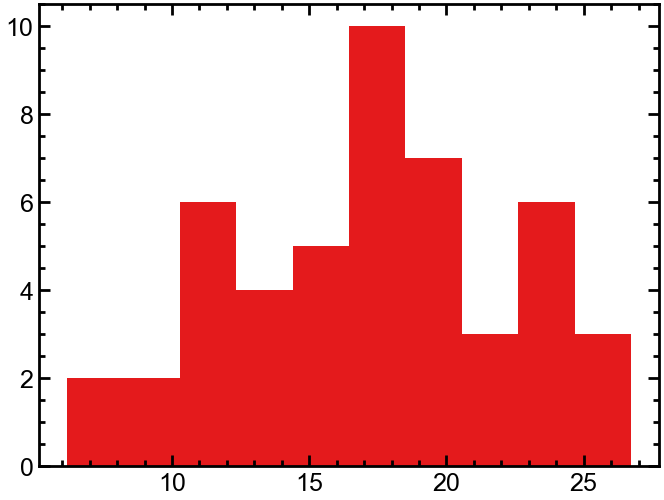

In [47]:
plt.hist(ljpcff.targets)

In [48]:
# datacopy.loc[names]

In [49]:
datacopy = ljpcff.data.copy()
datacopy["fitE"] = a
datacopy["target"] = ljpcff.targets
datacopy

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol,DUMMY,fitE,target
KEY,,,,,,,,,,,,
CLA_0_0,18.85243,-128.85083,19.34920,CLA_0_0,-1376.416247,13,-1376.581053,-103.415858,-863808.740294,0.0,74.244743,25.434975
CLA_10_10,23.63863,-118.42775,16.92126,CLA_10_10,-1376.405876,13,-1376.561974,-97.952108,-863796.768452,0.0,66.390221,20.475639
CLA_11_11,18.82327,-130.41177,21.37754,CLA_11_11,-1376.414714,13,-1376.589098,-109.426257,-863813.788831,0.0,84.021721,20.985519
CLA_12_12,20.30921,-121.46458,16.47598,CLA_12_12,-1376.413713,13,-1376.578023,-103.105382,-863806.839443,0.0,78.391220,18.359192
CLA_13_13,21.35419,-125.26648,14.10333,CLA_13_13,-1376.404228,13,-1376.571877,-105.199648,-863802.982226,0.0,73.259979,20.066833
CLA_14_14,18.95324,-126.36014,16.63419,CLA_14_14,-1376.414614,13,-1376.577958,-102.499032,-863806.798341,0.0,70.857445,23.861107
CLA_15_15,21.08890,-128.11498,16.82913,CLA_15_15,-1376.411935,13,-1376.583430,-107.613520,-863810.232013,0.0,69.441284,20.501457
CLA_16_16,18.58294,-133.25231,16.36383,CLA_16_16,-1376.410314,13,-1376.585873,-110.163762,-863811.765266,0.0,77.183884,23.088539
CLA_17_17,22.05784,-125.83273,15.41535,CLA_17_17,-1376.405563,13,-1376.576547,-107.292879,-863805.912934,0.0,68.331749,18.539856


In [50]:
datacopy = datacopy.loc[names]
datacopy["EPOL"] = polE
datacopy["ECI"] = ciE

In [51]:
datacopy

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol,DUMMY,fitE,target,EPOL,ECI
KEY,,,,,,,,,,,,,,
CLA_0_0,18.85243,-128.85083,19.34920,CLA_0_0,-1376.416247,13,-1376.581053,-103.415858,-863808.740294,0.0,74.244743,25.434975,-0.414108,-172.294749
CLA_1_1,20.20323,-122.14153,11.14480,CLA_1_1,-1376.414230,13,-1376.593751,-112.650048,-863816.708521,0.0,61.685196,9.491486,-3.187519,-162.753902
CLA_2_2,20.90393,-121.77619,13.49791,CLA_2_2,-1376.412568,13,-1376.581717,-106.141266,-863809.157156,0.0,62.380707,15.634926,-0.135589,-161.600709
CLA_3_3,20.55848,-128.75106,21.04250,CLA_3_3,-1376.407986,13,-1376.579808,-107.818300,-863807.959015,0.0,79.375458,20.932755,-6.504204,-177.597984
CLA_4_4,18.35426,-134.27667,23.59448,CLA_4_4,-1376.417115,13,-1376.593019,-110.380281,-863816.249189,0.0,89.743233,23.896393,-5.087207,-195.571327
CLA_5_5,19.25299,-119.87681,8.11314,CLA_5_5,-1376.418301,13,-1376.592185,-109.112675,-863815.725720,0.0,54.458290,10.764130,-0.847746,-157.175740
CLA_6_6,19.67885,-127.72421,15.31569,CLA_6_6,-1376.415945,13,-1376.590417,-109.481339,-863814.616301,0.0,67.961586,18.242874,-2.887199,-173.456509
CLA_7_7,17.49158,-126.52431,20.39198,CLA_7_7,-1376.421728,13,-1376.583305,-101.390303,-863810.153688,0.0,74.850632,25.134003,1.230237,-179.849029
CLA_8_8,18.83498,-118.88087,11.49119,CLA_8_8,-1376.416586,13,-1376.576549,-100.377068,-863805.914133,0.0,60.810669,18.503799,2.347324,-160.935152


In [52]:
# np.sqrt(calc_rmse(
#     ljpcff.data.intE,
#     a + ljpcff.data.ELEC
# ))

# np.sqrt(calc_rmse(
# datacopy.intE,
#     datacopy.fitE + datacopy.ECI + datacopy.EPOL
# ))


In [53]:
np.sqrt(calc_rmse(
datacopy.intE,
    datacopy.fitE + datacopy.ECI + datacopy.EPOL
))

4.262446139497256

In [54]:
np.std(datacopy.intE - (datacopy.fitE + datacopy.ECI + datacopy.EPOL))

4.094383176500618

In [55]:
np.sqrt(calc_rmse(FFOBJ.data.intE, a_ + FFOBJ.data.ELECm))

59.24108424810488

In [56]:
np.std(FFOBJ.data.intE - ( a_ + FFOBJ.data.ELECm))

10.494732147645582

Text(0, 0.5, 'FF ENERGY [kcal/mol]')

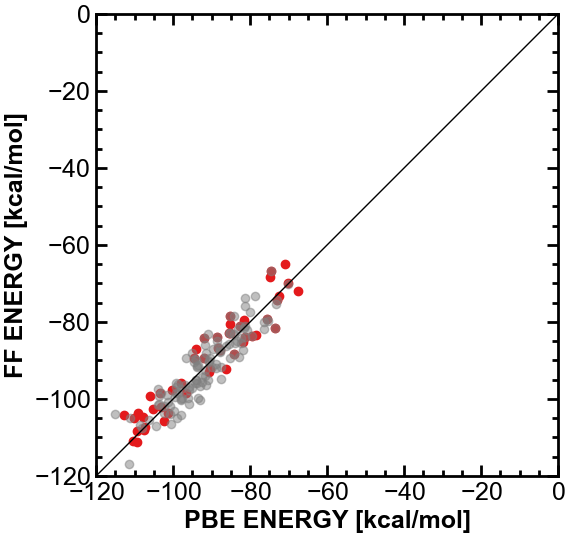

In [57]:
plt.scatter(
          datacopy.intE,
    datacopy.fitE + datacopy.ECI + datacopy.EPOL
           )
plt.scatter(FFOBJ.data.intE, a_ + FFOBJ.data.ELECpol,  c="gray", alpha=0.5)

plt.plot([-120, 0], [-120, 0], c="k")

plt.xlim(-120, 0)
plt.ylim(-120, 0)
plt.gca().set_aspect('equal')

plt.xlabel("PBE ENERGY [kcal/mol]")
plt.ylabel("FF ENERGY [kcal/mol]")
# plt.savefig("water_ci_test.png")

In [58]:
datacopy["POT"] = ["POT" in _ for _ in datacopy.index]

In [59]:
datacopy["residuals"] = datacopy.intE - (datacopy.fitE + datacopy.ECI + datacopy.EPOL)
print(datacopy[datacopy["POT"]]["residuals"].std())
np.sqrt(np.sum(datacopy[datacopy["POT"]]["residuals"]**2)/len(datacopy[datacopy["POT"]]))

4.424826357863634


4.361214349471219

In [60]:
print(datacopy[datacopy["POT"] == False]["residuals"].std())
np.sqrt(np.sum(datacopy[datacopy["POT"] == False]["residuals"]**2)/len(datacopy[datacopy["POT"] == False]))

3.4935644355559803


4.1201949199314605

In [35]:
datacopy.ELEC + datacopy.EPOL

KEY
test0    -118.862363
test1    -127.525264
test2    -123.624245
test3    -123.658581
test4     -94.142098
test5    -138.048353
test6    -140.140754
test7    -102.955511
test8    -128.956009
test9    -119.479721
test10   -132.643511
test11   -124.962830
test12   -102.917665
test13   -116.993678
test14   -111.887659
test15   -112.025413
test16   -130.456218
test17    -98.583588
test18   -116.141396
test19   -124.857491
dtype: float64

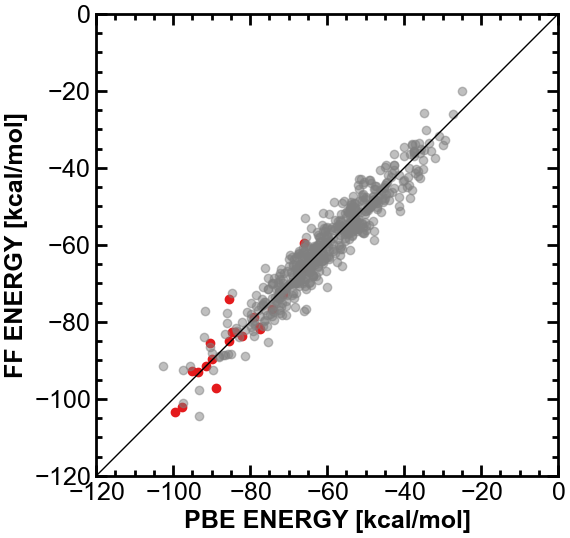

In [37]:
plt.scatter(datacopy.intE,
    datacopy.fitE + datacopy.ECI + datacopy.EPOL
            )
plt.scatter(FFOBJ.data.intE, a_ + FFOBJ.data.ELECpol, c="gray", alpha=0.5)

plt.plot([-120, 0], [-120, 0], c="k")

plt.xlim(-120, 0)
plt.ylim(-120, 0)
plt.gca().set_aspect('equal')

plt.xlabel("PBE ENERGY [kcal/mol]")
plt.ylabel("FF ENERGY [kcal/mol]")
plt.savefig("water_pol_test.png")